<a href="https://colab.research.google.com/github/matin-karimpour/ai-workshop-hut/blob/main/GAN_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Generative Adversarial Network using Keras

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

#### Getting the data

In [ ]:
# load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


#### Explore visual data

The CIFAR-10 images are RGB with 10 classes

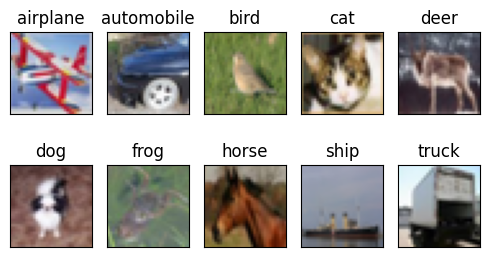

In [ ]:
WIDTH_SIZE = 5
HEIGHT_SIZE = 3

num_classes = len(np.unique(y_train))
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(WIDTH_SIZE, HEIGHT_SIZE))
for i in range(num_classes):
    ax = plt.subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    img = features_idx[img_num,::]
    ax.set_title(class_names[i])
    plt.imshow(img)

plt.tight_layout()


#### Reshaping and normalizing the inputs

In [ ]:
# For different class select a number between 0 and 9
class_index = 8
X_train = X_train[y_train.flatten() == class_index]
X_test = X_test[y_test.flatten() == class_index]

array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
if tf.keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, 32, 32)
    X_test = X_test.reshape(X_test.shape[0], 3, 32, 32)
    input_shape = (3, 32, 32)
else:
    X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
    X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
    input_shape = (32, 32, 3)

# convert class vectors to binary class matrices
Y_train = tf.keras.utils.to_categorical(y_train, num_classes)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# the generator is using tanh activation, for which we need to preprocess
# the image data into the range between -1 and 1.

X_train = np.float32(X_train)
X_train = (X_train / 255 - 0.5) * 2
X_train = np.clip(X_train, -1, 1)

X_test = np.float32(X_test)
X_test = (X_test / 255 - 0.5) * 2
X_test = np.clip(X_test, -1, 1)

print('X_train reshape:', X_train.shape)
print('X_test reshape:', X_test.shape)


X_train reshape: (5000, 32, 32, 3)
X_test reshape: (1000, 32, 32, 3)


### 2. Define model

#### Generator

In [ ]:
# latent space dimension
latent_dim = 100

# Generator network

# create model
generator = tf.keras.models.Sequential()
# ============================= Start =============================




# ============================= End ===============================


#### Generator model visualization

In [ ]:
# prints a summary representation of your model
generator.summary()


#### Discriminator


In [ ]:
# imagem shape 32x32x3
img_shape = X_train[0].shape

# Discriminator network
discriminator = tf.keras.models.Sequential()

# ============================= Start =============================




# ============================= End ===============================

In [ ]:
# prints a summary representation of your model
discriminator.summary()


### 3. Compile model

#### Compile discriminator

In [ ]:
# ============================= Start =============================
# Optimizer adam with learning_rate: 0.0003, beta_1: 0.5

# compile discriminator with loss finction of binary crossentropy and metrics of binary accuracy



# ============================= End ===============================


#### Combined network

We connect the generator and the discriminator to make a DCGAN.

In [ ]:
# ============================= Start =============================
# Create combination of discriminator and generator



# ============================= End ===============================


d_g.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003, beta_1=0.5),
    loss="binary_crossentropy",
    metrics=["binary_accuracy"],
)


#### GAN model vizualization

In [ ]:
# prints a summary representation of your model
d_g.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_2 (Sequential)   (None, 32, 32, 3)         323696    
                                                                 
 sequential_3 (Sequential)   (None, 1)                 270753    
                                                                 
Total params: 594449 (2.27 MB)
Trainable params: 322448 (1.23 MB)
Non-trainable params: 272001 (1.04 MB)
_________________________________________________________________


### 4. Fit model


epoch = 1/500, d_loss=0.396, g_loss=5.585                                                                                                     
1/1 [==============================] - 0s 280ms/step


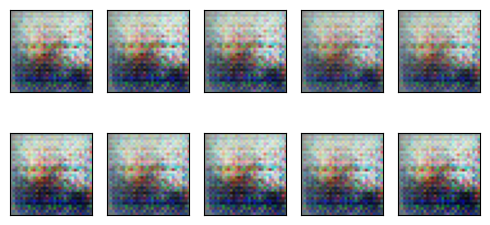

epoch = 2/500, d_loss=0.278, g_loss=1.955                                                                                                     
epoch = 3/500, d_loss=0.500, g_loss=1.815                                                                                                     
epoch = 4/500, d_loss=0.454, g_loss=1.875                                                                                                     
epoch = 5/500, d_loss=0.377, g_loss=0.712                                                                                                     
epoch = 6/500, d_loss=0.535, g_loss=1.204                                                                                                     
epoch = 7/500, d_loss=0.367, g_loss=1.226                                                                                                     
epoch = 8/500, d_loss=0.472, g_loss=1.365                                                                                                     

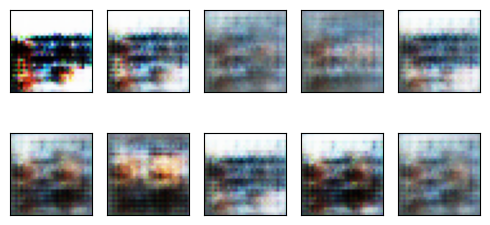

epoch = 12/500, d_loss=0.365, g_loss=1.847                                                                                                     
epoch = 13/500, d_loss=0.653, g_loss=1.893                                                                                                     
epoch = 14/500, d_loss=0.515, g_loss=1.554                                                                                                     
epoch = 15/500, d_loss=0.564, g_loss=1.474                                                                                                     
epoch = 16/500, d_loss=0.352, g_loss=1.909                                                                                                     
epoch = 17/500, d_loss=0.428, g_loss=1.748                                                                                                     
epoch = 18/500, d_loss=0.395, g_loss=1.416                                                                                              

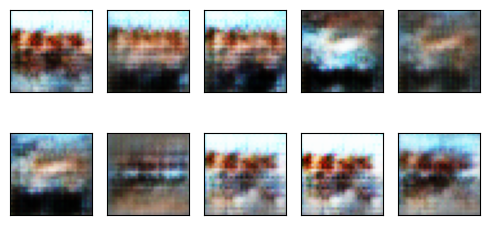

epoch = 22/500, d_loss=0.346, g_loss=1.446                                                                                                     
epoch = 23/500, d_loss=0.522, g_loss=1.191                                                                                                     
epoch = 24/500, d_loss=0.290, g_loss=1.206                                                                                                     
epoch = 25/500, d_loss=0.295, g_loss=0.415                                                                                                     
epoch = 26/500, d_loss=0.560, g_loss=2.007                                                                                                     
epoch = 27/500, d_loss=0.362, g_loss=1.639                                                                                                     
epoch = 28/500, d_loss=0.418, g_loss=2.484                                                                                              

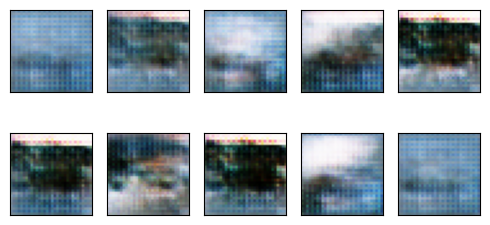

epoch = 32/500, d_loss=0.293, g_loss=1.642                                                                                                     
epoch = 33/500, d_loss=0.518, g_loss=2.158                                                                                                     
epoch = 34/500, d_loss=0.307, g_loss=2.102                                                                                                     
epoch = 35/500, d_loss=0.436, g_loss=1.940                                                                                                     
epoch = 36/500, d_loss=0.539, g_loss=2.165                                                                                                     
epoch = 37/500, d_loss=0.371, g_loss=0.683                                                                                                     
epoch = 38/500, d_loss=0.296, g_loss=1.616                                                                                              

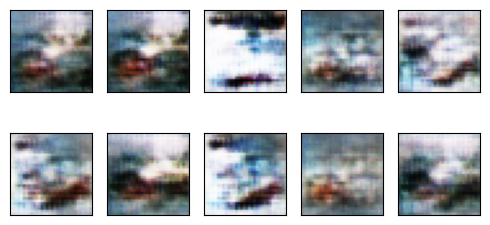

epoch = 42/500, d_loss=0.316, g_loss=2.369                                                                                                     
epoch = 43/500, d_loss=0.462, g_loss=1.682                                                                                                     
epoch = 44/500, d_loss=0.240, g_loss=0.847                                                                                                     
epoch = 45/500, d_loss=0.458, g_loss=0.831                                                                                                     
epoch = 46/500, d_loss=0.303, g_loss=1.177                                                                                                     
epoch = 47/500, d_loss=0.497, g_loss=1.169                                                                                                     
epoch = 48/500, d_loss=0.317, g_loss=1.205                                                                                              

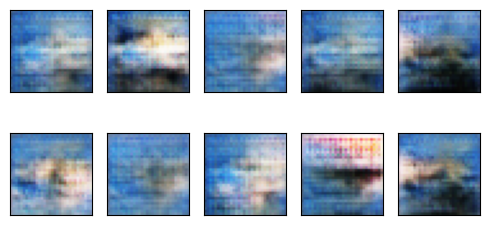

epoch = 52/500, d_loss=0.346, g_loss=1.573                                                                                                     
epoch = 53/500, d_loss=0.361, g_loss=2.637                                                                                                     
epoch = 54/500, d_loss=0.447, g_loss=2.225                                                                                                     
epoch = 55/500, d_loss=0.660, g_loss=3.206                                                                                                     
epoch = 56/500, d_loss=0.362, g_loss=1.280                                                                                                     
epoch = 57/500, d_loss=0.279, g_loss=1.023                                                                                                     
epoch = 58/500, d_loss=0.258, g_loss=1.491                                                                                              

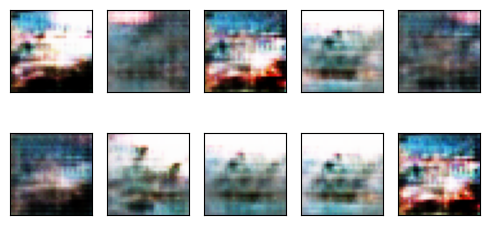

epoch = 62/500, d_loss=0.307, g_loss=1.412                                                                                                     
epoch = 63/500, d_loss=0.310, g_loss=1.440                                                                                                     
epoch = 64/500, d_loss=0.432, g_loss=1.898                                                                                                     
epoch = 65/500, d_loss=0.344, g_loss=0.945                                                                                                     
epoch = 66/500, d_loss=0.489, g_loss=2.121                                                                                                     
epoch = 67/500, d_loss=0.336, g_loss=1.366                                                                                                     
epoch = 68/500, d_loss=0.286, g_loss=2.117                                                                                              

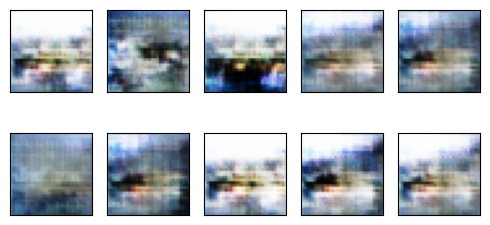

epoch = 72/500, d_loss=0.328, g_loss=3.556                                                                                                     
epoch = 73/500, d_loss=0.425, g_loss=1.485                                                                                                     
epoch = 74/500, d_loss=0.383, g_loss=3.306                                                                                                     
epoch = 75/500, d_loss=0.333, g_loss=1.343                                                                                                     
epoch = 76/500, d_loss=0.399, g_loss=2.708                                                                                                     
epoch = 77/500, d_loss=0.300, g_loss=2.446                                                                                                     
epoch = 78/500, d_loss=0.387, g_loss=2.651                                                                                              

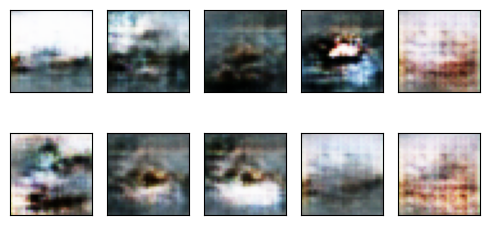

epoch = 82/500, d_loss=0.433, g_loss=3.035                                                                                                     
epoch = 83/500, d_loss=0.453, g_loss=2.162                                                                                                     
epoch = 84/500, d_loss=0.416, g_loss=1.538                                                                                                     
epoch = 85/500, d_loss=0.423, g_loss=2.259                                                                                                     
epoch = 86/500, d_loss=0.393, g_loss=2.479                                                                                                     
epoch = 87/500, d_loss=0.523, g_loss=2.310                                                                                                     
epoch = 88/500, d_loss=0.471, g_loss=2.116                                                                                              

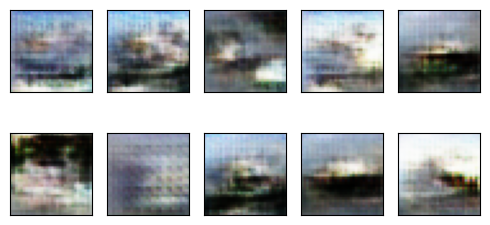

epoch = 92/500, d_loss=0.466, g_loss=2.112                                                                                                     
epoch = 93/500, d_loss=0.462, g_loss=2.042                                                                                                     
epoch = 94/500, d_loss=0.420, g_loss=1.233                                                                                                     
epoch = 95/500, d_loss=0.415, g_loss=2.268                                                                                                     
epoch = 96/500, d_loss=0.449, g_loss=1.826                                                                                                     
epoch = 97/500, d_loss=0.351, g_loss=1.564                                                                                                     
epoch = 98/500, d_loss=0.457, g_loss=2.005                                                                                              

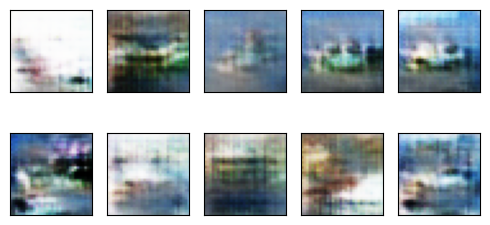

epoch = 102/500, d_loss=0.560, g_loss=2.042                                                                                                     
epoch = 103/500, d_loss=0.540, g_loss=1.627                                                                                                     
epoch = 104/500, d_loss=0.542, g_loss=2.085                                                                                                     
epoch = 105/500, d_loss=0.463, g_loss=1.850                                                                                                     
epoch = 106/500, d_loss=0.492, g_loss=1.983                                                                                                     
epoch = 107/500, d_loss=0.543, g_loss=1.389                                                                                                     
epoch = 108/500, d_loss=0.475, g_loss=1.741                                                                                       

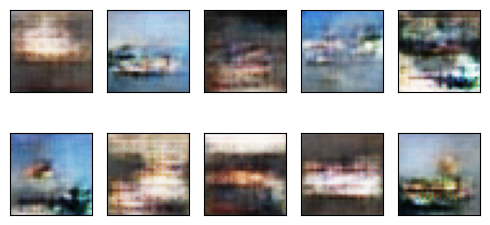

epoch = 112/500, d_loss=0.444, g_loss=1.882                                                                                                     
epoch = 113/500, d_loss=0.574, g_loss=1.722                                                                                                     
epoch = 114/500, d_loss=0.567, g_loss=1.732                                                                                                     
epoch = 115/500, d_loss=0.509, g_loss=1.832                                                                                                     
epoch = 116/500, d_loss=0.639, g_loss=1.835                                                                                                     
epoch = 117/500, d_loss=0.591, g_loss=1.989                                                                                                     
epoch = 118/500, d_loss=0.624, g_loss=1.579                                                                                       

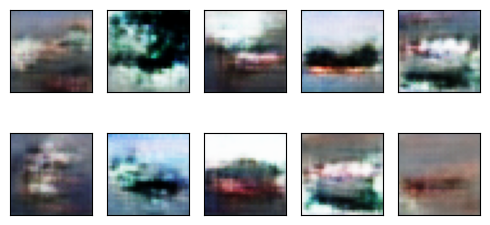

epoch = 122/500, d_loss=0.422, g_loss=1.784                                                                                                     
epoch = 123/500, d_loss=0.489, g_loss=1.800                                                                                                     
epoch = 124/500, d_loss=0.469, g_loss=1.493                                                                                                     
epoch = 125/500, d_loss=0.483, g_loss=1.778                                                                                                     
epoch = 126/500, d_loss=0.497, g_loss=1.508                                                                                                     
epoch = 127/500, d_loss=0.595, g_loss=1.716                                                                                                     
epoch = 128/500, d_loss=0.481, g_loss=1.829                                                                                       

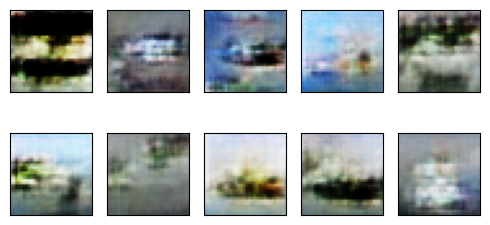

epoch = 132/500, d_loss=0.580, g_loss=1.652                                                                                                     
epoch = 133/500, d_loss=0.474, g_loss=1.982                                                                                                     
epoch = 134/500, d_loss=0.493, g_loss=1.828                                                                                                     
epoch = 135/500, d_loss=0.463, g_loss=1.507                                                                                                     
epoch = 136/500, d_loss=0.654, g_loss=1.734                                                                                                     
epoch = 137/500, d_loss=0.504, g_loss=1.692                                                                                                     
epoch = 138/500, d_loss=0.553, g_loss=1.468                                                                                       

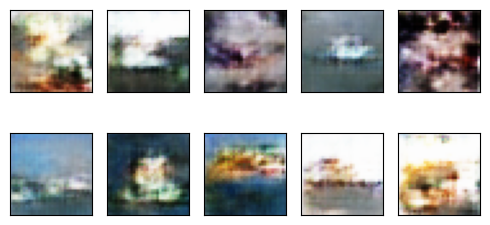

epoch = 142/500, d_loss=0.525, g_loss=1.670                                                                                                     
epoch = 143/500, d_loss=0.597, g_loss=1.454                                                                                                     
epoch = 144/500, d_loss=0.614, g_loss=1.726                                                                                                     
epoch = 145/500, d_loss=0.550, g_loss=1.306                                                                                                     
epoch = 146/500, d_loss=0.495, g_loss=1.620                                                                                                     
epoch = 147/500, d_loss=0.558, g_loss=1.563                                                                                                     
epoch = 148/500, d_loss=0.548, g_loss=1.424                                                                                       

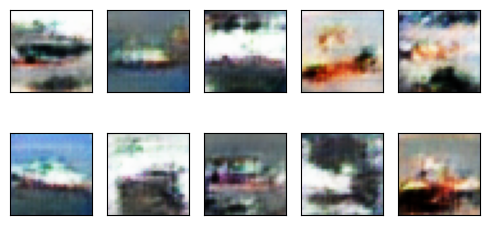

epoch = 152/500, d_loss=0.512, g_loss=1.431                                                                                                     
epoch = 153/500, d_loss=0.549, g_loss=1.485                                                                                                     
epoch = 154/500, d_loss=0.672, g_loss=1.474                                                                                                     
epoch = 155/500, d_loss=0.582, g_loss=1.621                                                                                                     
epoch = 156/500, d_loss=0.591, g_loss=1.569                                                                                                     
epoch = 157/500, d_loss=0.591, g_loss=1.622                                                                                                     
epoch = 158/500, d_loss=0.538, g_loss=1.401                                                                                       

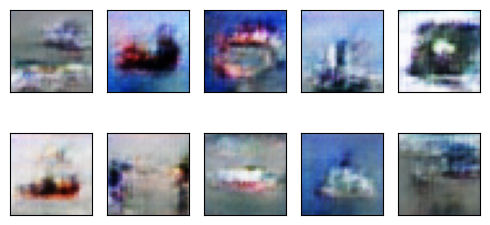

epoch = 162/500, d_loss=0.586, g_loss=1.406                                                                                                     
epoch = 163/500, d_loss=0.547, g_loss=1.550                                                                                                     
epoch = 164/500, d_loss=0.540, g_loss=1.587                                                                                                     
epoch = 165/500, d_loss=0.537, g_loss=1.493                                                                                                     
epoch = 166/500, d_loss=0.589, g_loss=1.601                                                                                                     
epoch = 167/500, d_loss=0.685, g_loss=1.483                                                                                                     
epoch = 168/500, d_loss=0.539, g_loss=1.355                                                                                       

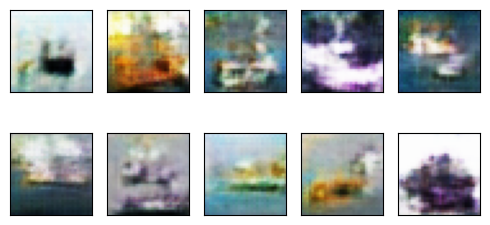

epoch = 172/500, d_loss=0.491, g_loss=1.682                                                                                                     
epoch = 173/500, d_loss=0.623, g_loss=1.842                                                                                                     
epoch = 174/500, d_loss=0.483, g_loss=1.817                                                                                                     
epoch = 175/500, d_loss=0.569, g_loss=1.406                                                                                                     
epoch = 176/500, d_loss=0.605, g_loss=1.781                                                                                                     
epoch = 177/500, d_loss=0.574, g_loss=1.702                                                                                                     
epoch = 178/500, d_loss=0.537, g_loss=1.527                                                                                       

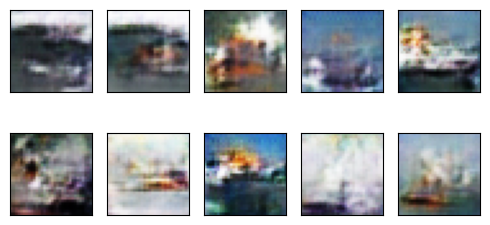

epoch = 182/500, d_loss=0.575, g_loss=1.428                                                                                                     
epoch = 183/500, d_loss=0.576, g_loss=1.516                                                                                                     
epoch = 184/500, d_loss=0.579, g_loss=1.494                                                                                                     
epoch = 185/500, d_loss=0.649, g_loss=1.365                                                                                                     
epoch = 186/500, d_loss=0.559, g_loss=1.427                                                                                                     
epoch = 187/500, d_loss=0.499, g_loss=1.561                                                                                                     
epoch = 188/500, d_loss=0.548, g_loss=1.466                                                                                       

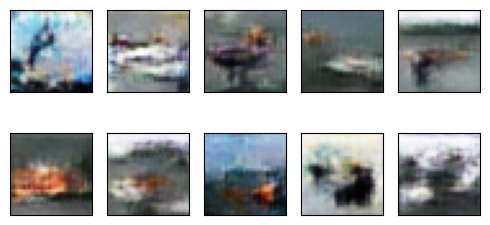

epoch = 192/500, d_loss=0.519, g_loss=1.395                                                                                                     
epoch = 193/500, d_loss=0.562, g_loss=1.225                                                                                                     
epoch = 194/500, d_loss=0.553, g_loss=1.696                                                                                                     
epoch = 195/500, d_loss=0.580, g_loss=1.490                                                                                                     
epoch = 196/500, d_loss=0.526, g_loss=1.523                                                                                                     
epoch = 197/500, d_loss=0.559, g_loss=1.563                                                                                                     
epoch = 198/500, d_loss=0.637, g_loss=1.553                                                                                       

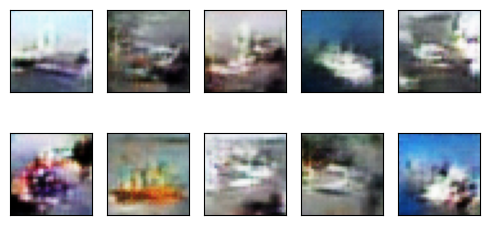

epoch = 202/500, d_loss=0.548, g_loss=1.574                                                                                                     
epoch = 203/500, d_loss=0.550, g_loss=1.368                                                                                                     
epoch = 204/500, d_loss=0.583, g_loss=1.609                                                                                                     
epoch = 205/500, d_loss=0.601, g_loss=1.239                                                                                                     
epoch = 206/500, d_loss=0.633, g_loss=1.389                                                                                                     
epoch = 207/500, d_loss=0.530, g_loss=1.321                                                                                                     
epoch = 208/500, d_loss=0.496, g_loss=1.465                                                                                       

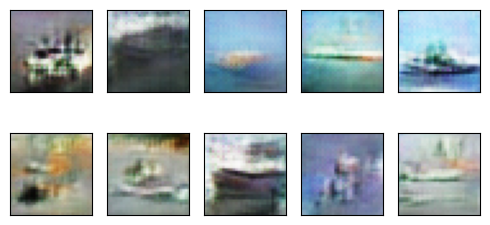

epoch = 212/500, d_loss=0.561, g_loss=1.530                                                                                                     
epoch = 213/500, d_loss=0.483, g_loss=1.554                                                                                                     
epoch = 214/500, d_loss=0.544, g_loss=1.515                                                                                                     
epoch = 215/500, d_loss=0.576, g_loss=1.479                                                                                                     
epoch = 216/500, d_loss=0.534, g_loss=1.472                                                                                                     
epoch = 217/500, d_loss=0.526, g_loss=1.346                                                                                                     
epoch = 218/500, d_loss=0.574, g_loss=1.401                                                                                       

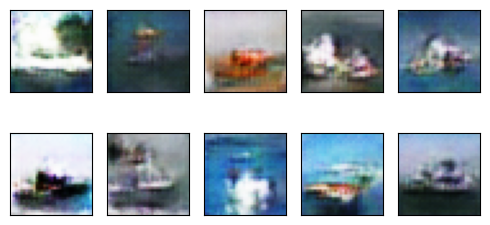

epoch = 222/500, d_loss=0.535, g_loss=1.378                                                                                                     
epoch = 223/500, d_loss=0.492, g_loss=1.243                                                                                                     
epoch = 224/500, d_loss=0.584, g_loss=1.461                                                                                                     
epoch = 225/500, d_loss=0.590, g_loss=1.241                                                                                                     
epoch = 226/500, d_loss=0.478, g_loss=1.422                                                                                                     
epoch = 227/500, d_loss=0.533, g_loss=1.450                                                                                                     
epoch = 228/500, d_loss=0.520, g_loss=1.378                                                                                       

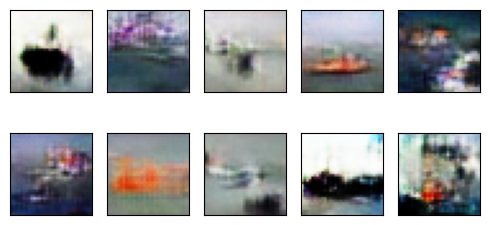

epoch = 232/500, d_loss=0.545, g_loss=1.503                                                                                                     
epoch = 233/500, d_loss=0.564, g_loss=1.525                                                                                                     
epoch = 234/500, d_loss=0.559, g_loss=1.475                                                                                                     
epoch = 235/500, d_loss=0.576, g_loss=1.602                                                                                                     
epoch = 236/500, d_loss=0.619, g_loss=1.446                                                                                                     
epoch = 237/500, d_loss=0.550, g_loss=1.569                                                                                                     
epoch = 238/500, d_loss=0.535, g_loss=1.381                                                                                       

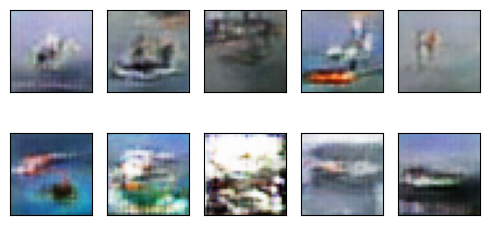

epoch = 242/500, d_loss=0.637, g_loss=1.301                                                                                                     
epoch = 243/500, d_loss=0.597, g_loss=1.319                                                                                                     
epoch = 244/500, d_loss=0.589, g_loss=1.300                                                                                                     
epoch = 245/500, d_loss=0.573, g_loss=1.381                                                                                                     
epoch = 246/500, d_loss=0.567, g_loss=1.356                                                                                                     
epoch = 247/500, d_loss=0.533, g_loss=1.283                                                                                                     
epoch = 248/500, d_loss=0.526, g_loss=1.328                                                                                       

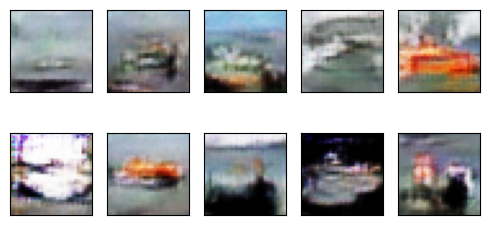

epoch = 252/500, d_loss=0.559, g_loss=1.341                                                                                                     
epoch = 253/500, d_loss=0.513, g_loss=1.226                                                                                                     
epoch = 254/500, d_loss=0.519, g_loss=1.479                                                                                                     
epoch = 255/500, d_loss=0.585, g_loss=1.140                                                                                                     
epoch = 256/500, d_loss=0.485, g_loss=1.257                                                                                                     
epoch = 257/500, d_loss=0.644, g_loss=1.387                                                                                                     
epoch = 258/500, d_loss=0.552, g_loss=1.252                                                                                       

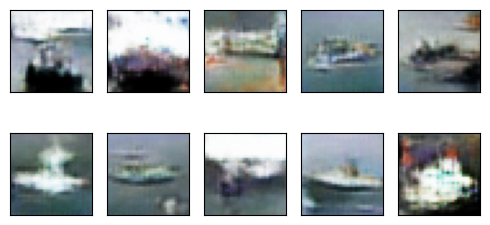

epoch = 262/500, d_loss=0.531, g_loss=1.268                                                                                                     
epoch = 263/500, d_loss=0.588, g_loss=1.431                                                                                                     
epoch = 264/500, d_loss=0.574, g_loss=1.316                                                                                                     
epoch = 265/500, d_loss=0.640, g_loss=1.210                                                                                                     
epoch = 266/500, d_loss=0.629, g_loss=1.336                                                                                                     
epoch = 267/500, d_loss=0.575, g_loss=1.373                                                                                                     
epoch = 268/500, d_loss=0.611, g_loss=1.268                                                                                       

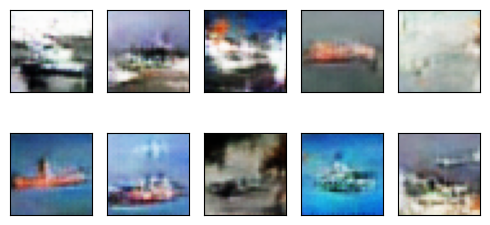

epoch = 272/500, d_loss=0.556, g_loss=1.369                                                                                                     
epoch = 273/500, d_loss=0.567, g_loss=1.312                                                                                                     
epoch = 274/500, d_loss=0.609, g_loss=1.425                                                                                                     
epoch = 275/500, d_loss=0.562, g_loss=1.316                                                                                                     
epoch = 276/500, d_loss=0.511, g_loss=1.274                                                                                                     
epoch = 277/500, d_loss=0.559, g_loss=1.306                                                                                                     
epoch = 278/500, d_loss=0.608, g_loss=1.573                                                                                       

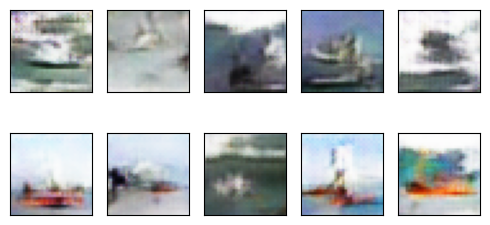

epoch = 282/500, d_loss=0.607, g_loss=1.248                                                                                                     
epoch = 283/500, d_loss=0.571, g_loss=1.332                                                                                                     
epoch = 284/500, d_loss=0.571, g_loss=1.316                                                                                                     
epoch = 285/500, d_loss=0.568, g_loss=1.140                                                                                                     
epoch = 286/500, d_loss=0.566, g_loss=1.172                                                                                                     
epoch = 287/500, d_loss=0.626, g_loss=1.162                                                                                                     
epoch = 288/500, d_loss=0.573, g_loss=1.286                                                                                       

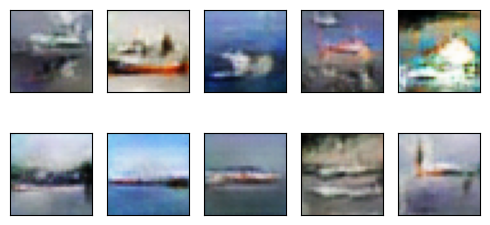

epoch = 292/500, d_loss=0.659, g_loss=1.164                                                                                                     
epoch = 293/500, d_loss=0.589, g_loss=1.470                                                                                                     
epoch = 294/500, d_loss=0.561, g_loss=1.366                                                                                                     
epoch = 295/500, d_loss=0.613, g_loss=1.378                                                                                                     
epoch = 296/500, d_loss=0.563, g_loss=1.345                                                                                                     
epoch = 297/500, d_loss=0.608, g_loss=1.225                                                                                                     
epoch = 298/500, d_loss=0.512, g_loss=1.166                                                                                       

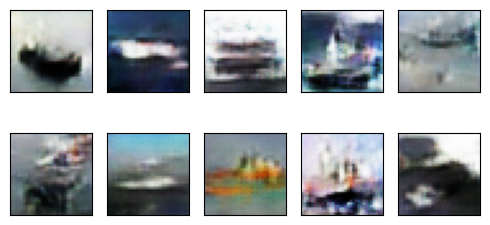

epoch = 302/500, d_loss=0.552, g_loss=1.156                                                                                                     
epoch = 303/500, d_loss=0.609, g_loss=1.281                                                                                                     
epoch = 304/500, d_loss=0.639, g_loss=1.244                                                                                                     
epoch = 305/500, d_loss=0.612, g_loss=1.518                                                                                                     
epoch = 306/500, d_loss=0.610, g_loss=1.249                                                                                                     
epoch = 307/500, d_loss=0.649, g_loss=1.264                                                                                                     
epoch = 308/500, d_loss=0.590, g_loss=1.467                                                                                       

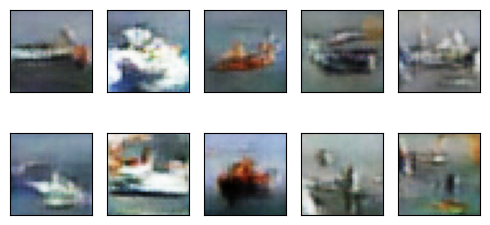

epoch = 312/500, d_loss=0.554, g_loss=1.225                                                                                                     
epoch = 313/500, d_loss=0.554, g_loss=1.316                                                                                                     
epoch = 314/500, d_loss=0.606, g_loss=1.312                                                                                                     
epoch = 315/500, d_loss=0.584, g_loss=1.239                                                                                                     
epoch = 316/500, d_loss=0.565, g_loss=1.458                                                                                                     
epoch = 317/500, d_loss=0.604, g_loss=1.384                                                                                                     
epoch = 318/500, d_loss=0.557, g_loss=1.253                                                                                       

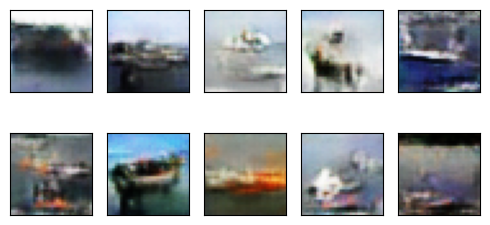

epoch = 322/500, d_loss=0.638, g_loss=1.295                                                                                                     
epoch = 323/500, d_loss=0.687, g_loss=1.277                                                                                                     
epoch = 324/500, d_loss=0.564, g_loss=1.345                                                                                                     
epoch = 325/500, d_loss=0.542, g_loss=1.300                                                                                                     
epoch = 326/500, d_loss=0.598, g_loss=1.134                                                                                                     
epoch = 327/500, d_loss=0.674, g_loss=1.355                                                                                                     
epoch = 328/500, d_loss=0.570, g_loss=1.247                                                                                       

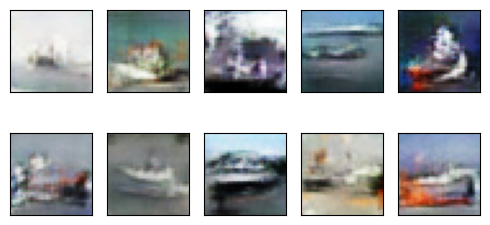

epoch = 332/500, d_loss=0.500, g_loss=1.255                                                                                                     
epoch = 333/500, d_loss=0.610, g_loss=1.277                                                                                                     
epoch = 334/500, d_loss=0.542, g_loss=1.384                                                                                                     
epoch = 335/500, d_loss=0.593, g_loss=1.443                                                                                                     
epoch = 336/500, d_loss=0.602, g_loss=1.371                                                                                                     
epoch = 337/500, d_loss=0.547, g_loss=1.342                                                                                                     
epoch = 338/500, d_loss=0.662, g_loss=1.134                                                                                       

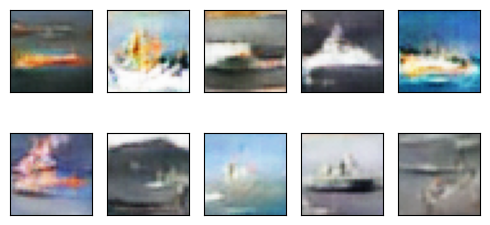

epoch = 342/500, d_loss=0.555, g_loss=1.171                                                                                                     
epoch = 343/500, d_loss=0.548, g_loss=1.366                                                                                                     
epoch = 344/500, d_loss=0.561, g_loss=1.342                                                                                                     
epoch = 345/500, d_loss=0.569, g_loss=1.204                                                                                                     
epoch = 346/500, d_loss=0.644, g_loss=1.311                                                                                                     
epoch = 347/500, d_loss=0.595, g_loss=1.200                                                                                                     
epoch = 348/500, d_loss=0.633, g_loss=1.192                                                                                       

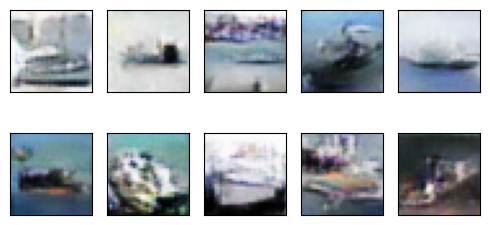

epoch = 352/500, d_loss=0.598, g_loss=1.175                                                                                                     
epoch = 353/500, d_loss=0.642, g_loss=1.224                                                                                                     
epoch = 354/500, d_loss=0.601, g_loss=1.304                                                                                                     
epoch = 355/500, d_loss=0.554, g_loss=1.303                                                                                                     
epoch = 356/500, d_loss=0.603, g_loss=1.338                                                                                                     
epoch = 357/500, d_loss=0.546, g_loss=1.174                                                                                                     
epoch = 358/500, d_loss=0.558, g_loss=1.091                                                                                       

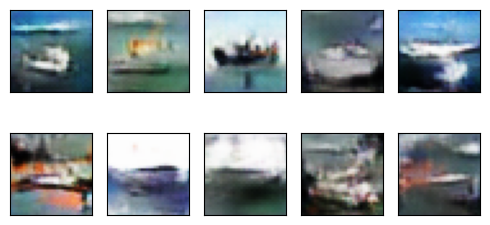

epoch = 362/500, d_loss=0.617, g_loss=1.180                                                                                                     
epoch = 363/500, d_loss=0.613, g_loss=1.242                                                                                                     
epoch = 364/500, d_loss=0.663, g_loss=1.247                                                                                                     
epoch = 365/500, d_loss=0.663, g_loss=1.405                                                                                                     
epoch = 366/500, d_loss=0.583, g_loss=1.427                                                                                                     
epoch = 367/500, d_loss=0.650, g_loss=1.378                                                                                                     
epoch = 368/500, d_loss=0.583, g_loss=1.135                                                                                       

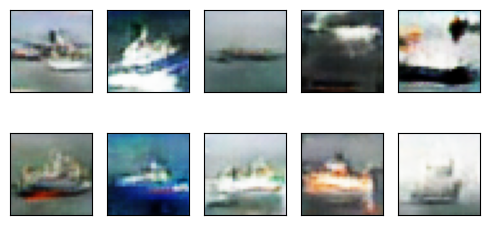

epoch = 372/500, d_loss=0.595, g_loss=1.380                                                                                                     
epoch = 373/500, d_loss=0.608, g_loss=1.106                                                                                                     
epoch = 374/500, d_loss=0.626, g_loss=1.280                                                                                                     
epoch = 375/500, d_loss=0.510, g_loss=1.198                                                                                                     
epoch = 376/500, d_loss=0.587, g_loss=1.323                                                                                                     
epoch = 377/500, d_loss=0.588, g_loss=1.480                                                                                                     
epoch = 378/500, d_loss=0.574, g_loss=1.295                                                                                       

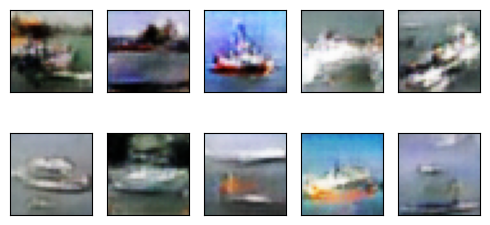

epoch = 382/500, d_loss=0.599, g_loss=1.127                                                                                                     
epoch = 383/500, d_loss=0.504, g_loss=1.414                                                                                                     
epoch = 384/500, d_loss=0.568, g_loss=1.228                                                                                                     
epoch = 385/500, d_loss=0.667, g_loss=1.549                                                                                                     
epoch = 386/500, d_loss=0.615, g_loss=1.136                                                                                                     
epoch = 387/500, d_loss=0.638, g_loss=1.065                                                                                                     
epoch = 388/500, d_loss=0.544, g_loss=1.224                                                                                       

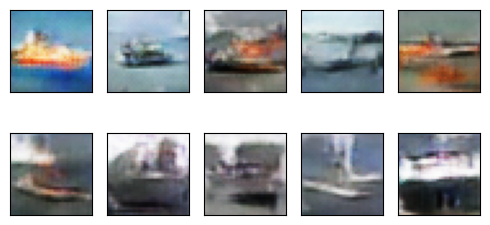

epoch = 392/500, d_loss=0.601, g_loss=1.303                                                                                                     
epoch = 393/500, d_loss=0.554, g_loss=1.222                                                                                                     
epoch = 394/500, d_loss=0.609, g_loss=1.231                                                                                                     
epoch = 395/500, d_loss=0.613, g_loss=1.319                                                                                                     
epoch = 396/500, d_loss=0.629, g_loss=1.094                                                                                                     
epoch = 397/500, d_loss=0.693, g_loss=1.228                                                                                                     
epoch = 398/500, d_loss=0.663, g_loss=1.435                                                                                       

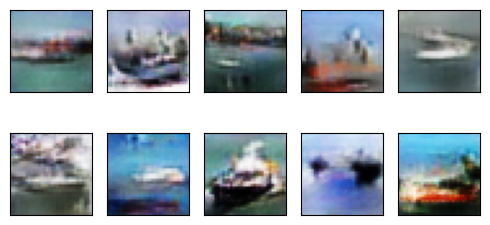

epoch = 402/500, d_loss=0.552, g_loss=1.437                                                                                                     
epoch = 403/500, d_loss=0.543, g_loss=1.311                                                                                                     
epoch = 404/500, d_loss=0.652, g_loss=1.181                                                                                                     
epoch = 405/500, d_loss=0.607, g_loss=1.286                                                                                                     
epoch = 406/500, d_loss=0.584, g_loss=1.232                                                                                                     
epoch = 407/500, d_loss=0.563, g_loss=1.097                                                                                                     
epoch = 408/500, d_loss=0.688, g_loss=1.240                                                                                       

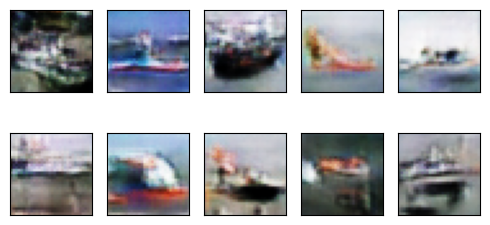

epoch = 412/500, d_loss=0.619, g_loss=1.298                                                                                                     
epoch = 413/500, d_loss=0.657, g_loss=1.273                                                                                                     
epoch = 414/500, d_loss=0.591, g_loss=1.049                                                                                                     
epoch = 415/500, d_loss=0.571, g_loss=1.286                                                                                                     
epoch = 416/500, d_loss=0.613, g_loss=1.254                                                                                                     
epoch = 417/500, d_loss=0.527, g_loss=1.294                                                                                                     
epoch = 418/500, d_loss=0.570, g_loss=1.352                                                                                       

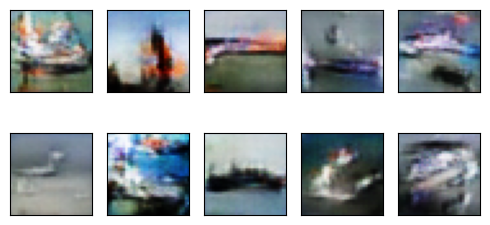

epoch = 422/500, d_loss=0.666, g_loss=1.260                                                                                                     
epoch = 423/500, d_loss=0.549, g_loss=1.288                                                                                                     
epoch = 424/500, d_loss=0.699, g_loss=1.293                                                                                                     
epoch = 425/500, d_loss=0.575, g_loss=1.245                                                                                                     
epoch = 426/500, d_loss=0.617, g_loss=1.150                                                                                                     
epoch = 427/500, d_loss=0.594, g_loss=1.473                                                                                                     
epoch = 428/500, d_loss=0.635, g_loss=1.312                                                                                       

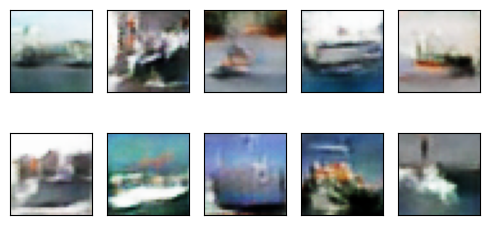

epoch = 432/500, d_loss=0.528, g_loss=1.284                                                                                                     
epoch = 433/500, d_loss=0.634, g_loss=1.048                                                                                                     
epoch = 434/500, d_loss=0.645, g_loss=1.204                                                                                                     
epoch = 435/500, d_loss=0.566, g_loss=1.309                                                                                                     
epoch = 436/500, d_loss=0.683, g_loss=1.456                                                                                                     
epoch = 437/500, d_loss=0.632, g_loss=1.114                                                                                                     
epoch = 438/500, d_loss=0.549, g_loss=1.059                                                                                       

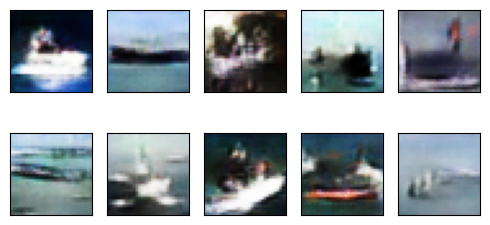

epoch = 442/500, d_loss=0.560, g_loss=1.329                                                                                                     
epoch = 443/500, d_loss=0.687, g_loss=1.180                                                                                                     
epoch = 444/500, d_loss=0.541, g_loss=1.362                                                                                                     
epoch = 445/500, d_loss=0.657, g_loss=1.271                                                                                                     
epoch = 446/500, d_loss=0.689, g_loss=1.180                                                                                                     
epoch = 447/500, d_loss=0.535, g_loss=1.260                                                                                                     
epoch = 448/500, d_loss=0.596, g_loss=1.125                                                                                       

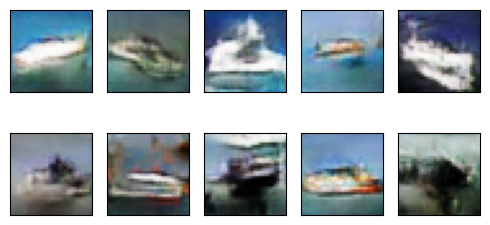

epoch = 452/500, d_loss=0.619, g_loss=1.205                                                                                                     
epoch = 453/500, d_loss=0.556, g_loss=1.045                                                                                                     
epoch = 454/500, d_loss=0.546, g_loss=1.169                                                                                                     
epoch = 455/500, d_loss=0.682, g_loss=1.189                                                                                                     
epoch = 456/500, d_loss=0.603, g_loss=1.251                                                                                                     
epoch = 457/500, d_loss=0.605, g_loss=1.112                                                                                                     
epoch = 458/500, d_loss=0.638, g_loss=1.208                                                                                       

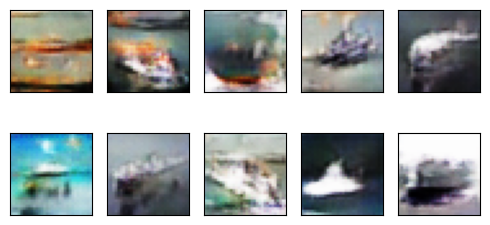

epoch = 462/500, d_loss=0.667, g_loss=1.086                                                                                                     
epoch = 463/500, d_loss=0.557, g_loss=1.103                                                                                                     
epoch = 464/500, d_loss=0.559, g_loss=1.484                                                                                                     
epoch = 465/500, d_loss=0.647, g_loss=1.127                                                                                                     
epoch = 466/500, d_loss=0.681, g_loss=1.223                                                                                                     
epoch = 467/500, d_loss=0.578, g_loss=1.171                                                                                                     
epoch = 468/500, d_loss=0.538, g_loss=1.492                                                                                       

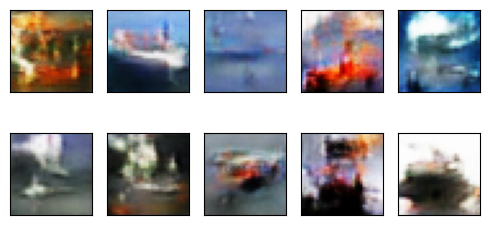

epoch = 472/500, d_loss=0.582, g_loss=1.295                                                                                                     
epoch = 473/500, d_loss=0.630, g_loss=1.320                                                                                                     
epoch = 474/500, d_loss=0.721, g_loss=1.370                                                                                                     
epoch = 475/500, d_loss=0.580, g_loss=1.227                                                                                                     
epoch = 476/500, d_loss=0.608, g_loss=1.115                                                                                                     
epoch = 477/500, d_loss=0.579, g_loss=1.243                                                                                                     
epoch = 478/500, d_loss=0.580, g_loss=1.239                                                                                       

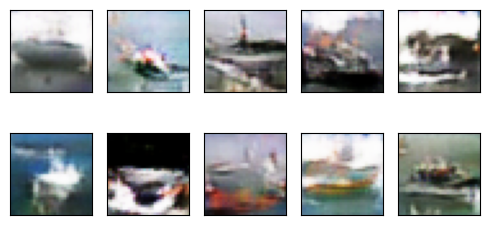

epoch = 482/500, d_loss=0.592, g_loss=1.239                                                                                                     
epoch = 483/500, d_loss=0.577, g_loss=1.089                                                                                                     
epoch = 484/500, d_loss=0.587, g_loss=1.219                                                                                                     
epoch = 485/500, d_loss=0.593, g_loss=1.200                                                                                                     
epoch = 486/500, d_loss=0.595, g_loss=1.272                                                                                                     
epoch = 487/500, d_loss=0.569, g_loss=0.999                                                                                                     
epoch = 488/500, d_loss=0.604, g_loss=1.151                                                                                       

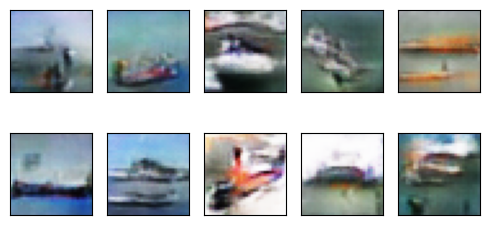

epoch = 492/500, d_loss=0.556, g_loss=1.259                                                                                                     


In [ ]:
epochs = 150
batch_size = 32

real = tf.ones(shape=(batch_size, 1))
fake = tf.zeros(shape=(batch_size, 1))

d_loss = []
g_loss = []

for e in range(epochs + 1):
    for i in range(len(X_train) // batch_size):


        # Train Discriminator weights
        discriminator.trainable = True

        # Real samples
        X_real = X_train[i * batch_size : (i + 1) * batch_size]

        # ============================= Start =============================
        # train discriminator first with real data and then with fake data

        # Fake Samples
        # random data for generator with mean 0 and stddev 1



        # ============================= End ===============================


        # Discriminator loss
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])

        # Train Generator weights
        discriminator.trainable = False


        # ============================= Start =============================
        # train generator
        # random data for generator with mean 0 and stddev 1



        # ============================= End ===============================)

        print(
            "epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f"
            % (
                e + 1,
                epochs,
                i,
                len(X_train) // batch_size,
                d_loss_batch,
                g_loss_batch[0],
            ),
            100 * " ",
            end="\r",
        )

    d_loss.append(d_loss_batch)
    g_loss.append(g_loss_batch[0])

    print(
        "epoch = %d/%d, d_loss=%.3f, g_loss=%.3f"
        % (e + 1, epochs, d_loss[-1], g_loss[-1]),
        100 * " ",
    )

    if e % 10 == 0:
        samples = 10

        z = tf.random.normal(shape=(samples, latent_dim), mean=0, stddev=1)
        x_fake = generator.predict(z)

        fig = plt.figure(figsize=(WIDTH_SIZE, HEIGHT_SIZE))
        for k in range(samples):
            plt.subplot(2, 5, k + 1, xticks=[], yticks=[])
            plt.imshow(((x_fake[k] + 1) * 127).astype(np.uint8))

        plt.tight_layout()
        plt.show()


In [ ]:
# plotting the metrics
plt.plot(d_loss)
plt.plot(g_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'Adversarial'], loc='center right')
plt.show()


1/1 [==============================] - 0s 26ms/step


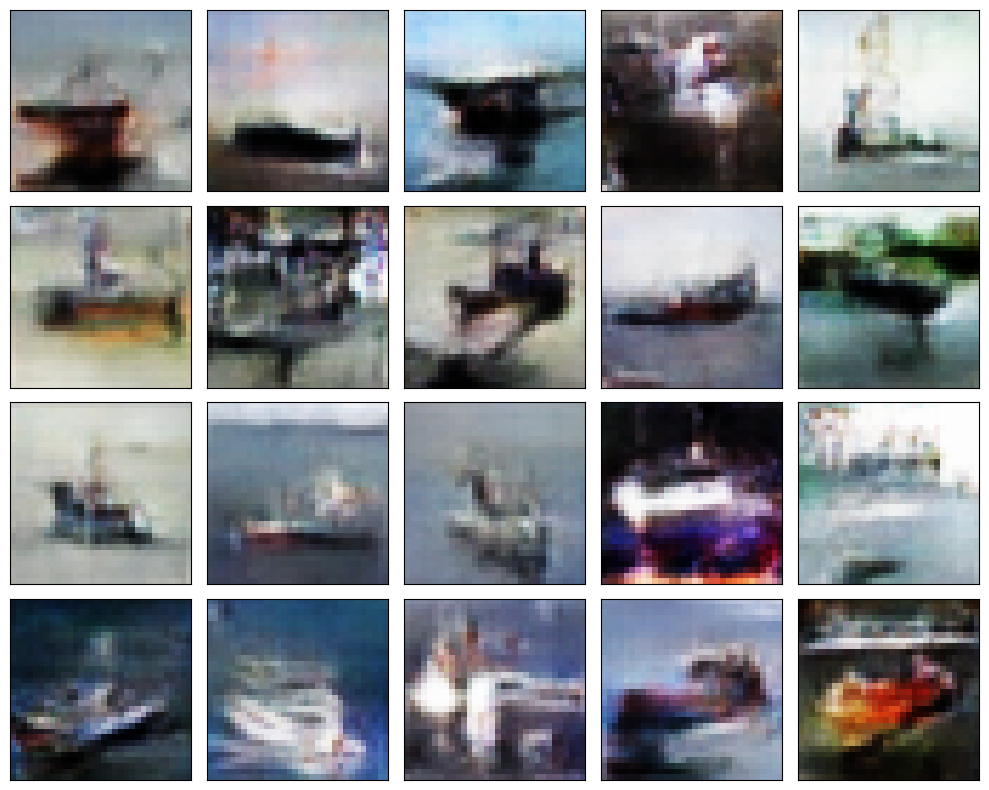

In [ ]:
samples = 20

z = tf.random.normal(shape=(samples, latent_dim), mean=0, stddev=1)
x_fake = generator.predict(z)

fig = plt.figure(figsize=(10, 8))
for k in range(samples):
    plt.subplot(4, 5, k + 1, xticks=[], yticks=[])
    plt.imshow(((x_fake[k] + 1) * 127).astype(np.uint8))

plt.tight_layout()
plt.show()
